# 0.0. IMPORTS

In [57]:
import pandas as pd

import numpy as np

import inflection

import math

import seaborn as sns

from matplotlib import pyplot as plt

from IPython.core.display import HTML

from IPython.display import Image

import datetime as dt

### 0.1. Helper functions

### 0.2. Loading data

In [23]:
df_sales_raw = pd.read_csv ('train.csv', low_memory=False)

In [24]:
df_store_raw = pd.read_csv ('store.csv', low_memory=False)

In [25]:
# Merge

In [26]:
df_raw = pd.merge (df_sales_raw, df_store_raw, how='left', on='Store')

In [27]:
#Verificando o merge

In [28]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
976749,795,3,2013-02-06,5818,611,1,1,0,0,d,a,510.0,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec"


# 1.0. DESCRICAO DOS DADOS

In [29]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

 ## 1.1. Rename Columns

In [30]:
df1 = df_raw.copy()

In [31]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = list(map(snakecase, cols_old))

# Rename
df1.columns = cols_new

In [32]:
# Verificando Rename método snakecase
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimensions

In [33]:
df1.shape

(1017209, 18)

## 1.3. Data types

In [34]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [35]:
#Alterando formato data
df1['date'] = pd.to_datetime (df1['date'])

In [36]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA's

In [37]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA's

In [38]:
#competition_distance verificando valor maximo atual
df1 ['competition_distance'].max()

75860.0

In [39]:
#competition_distance
df1 ['competition_distance'] = df1 ['competition_distance'].apply( lambda x: 200000.0 if math.isnan (x) else x)

#competition_open_since_month  
df1 ['competition_open_since_month'] = df1.apply (lambda x: x ['date'].month if math.isnan (x ['competition_open_since_month']) else x ['competition_open_since_month'], axis=1)

#competition_open_since_year
df1 ['competition_open_since_year'] = df1.apply (lambda x: x ['date'].year if math.isnan (x ['competition_open_since_year']) else x ['competition_open_since_year'], axis=1)
                             
#promo2_since_week 
df1 ['promo2_since_week'] = df1.apply (lambda x: x ['date'].week if math.isnan (x ['promo2_since_week']) else x ['promo2_since_week'], axis=1)

#promo2_since_year
df1 ['promo2_since_year'] = df1.apply (lambda x: x ['date'].year if math.isnan (x ['promo2_since_year']) else x ['promo2_since_year'], axis=1)

#promo_interval 
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'} 

df1 ['promo_interval'].fillna(0, inplace =True)
df1 ['month_map'] = df1 ['date'].dt.month.map(month_map)
df1 ['is_promo'] = df1[['promo_interval','month_map']].apply (lambda x: 0 if x ['promo_interval'] == 0 else 1 if x ['month_map'] in x ['promo_interval'].split (',') else 0, axis=1)

In [40]:
#Verificando coluna criada month_map
df1.sample(5).T

,70256,104013,400284,201840,93355
store,12,319,337,26,811
day_of_week,5,3,3,6,6
date,2015-05-29 00:00:00,2015-04-29 00:00:00,2014-07-09 00:00:00,2015-01-31 00:00:00,2015-05-09 00:00:00
sales,7665,8839,3107,6214,3727
customers,912,891,265,550,649
open,1,1,1,1,1
promo,0,1,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,a,d,d,a


In [41]:
# Verificando alteracoes NA's
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [42]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [43]:
# Convertendo de float para int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [44]:
#Verificando correcoes
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical

In [45]:
num_attributes = df1.select_dtypes (include = ['int64','int32', 'float64'])
cat_attributes = df1.select_dtypes (exclude = ['int64', 'float64','int32','datetime64[ns]'])

In [46]:
#Verificando
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
547559,880,3,6224,756,1,0,0,4570.0,2,2014,0,9,2014,0
974335,611,5,6067,512,1,1,0,8080.0,12,2002,1,40,2014,0


In [47]:
#Verificando
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
498117,0,a,a,"Jan,Apr,Jul,Oct",Apr
108645,0,d,c,"Mar,Jun,Sept,Dec",Apr


### 1.7.1 Numerical Attributes

In [48]:
#Central Tendency - Mean and Median
ct1 = pd.DataFrame (num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame (num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew and kurtosis
d1 = pd.DataFrame (num_attributes.apply(np.std)).T
d2 = pd.DataFrame (num_attributes.apply(min)).T
d3 = pd.DataFrame (num_attributes.apply(max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x: x.max() - x.min())).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew () )).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis () )).T

#Concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\Pamela.magalhaes\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

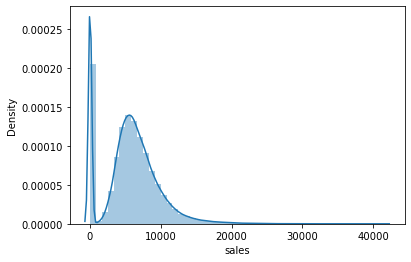

In [49]:
sns.distplot (df1['sales'])

C:\Users\Pamela.magalhaes\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

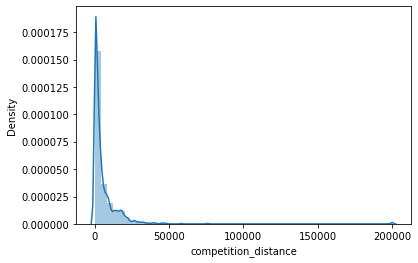

In [50]:
sns.distplot (df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [51]:
cat_attributes.apply (lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

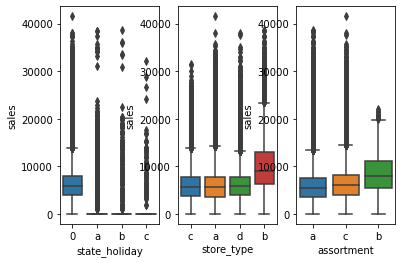

In [52]:
aux1 = df1[(df1['state_holiday'] != '0' ) & (df1['sales'] > 0) ]

plt.subplot(1,3,1)
sns.boxplot (x='state_holiday', y='sales',data=df1)

plt.subplot(1,3,2)
sns.boxplot (x='store_type', y='sales',data=df1)

plt.subplot(1,3,3)
sns.boxplot (x='assortment', y='sales',data=df1)


# 2.0.Feature Engineering

In [53]:
df2 = df1.copy ()

### 2.1 Mapa mental de hipóteses

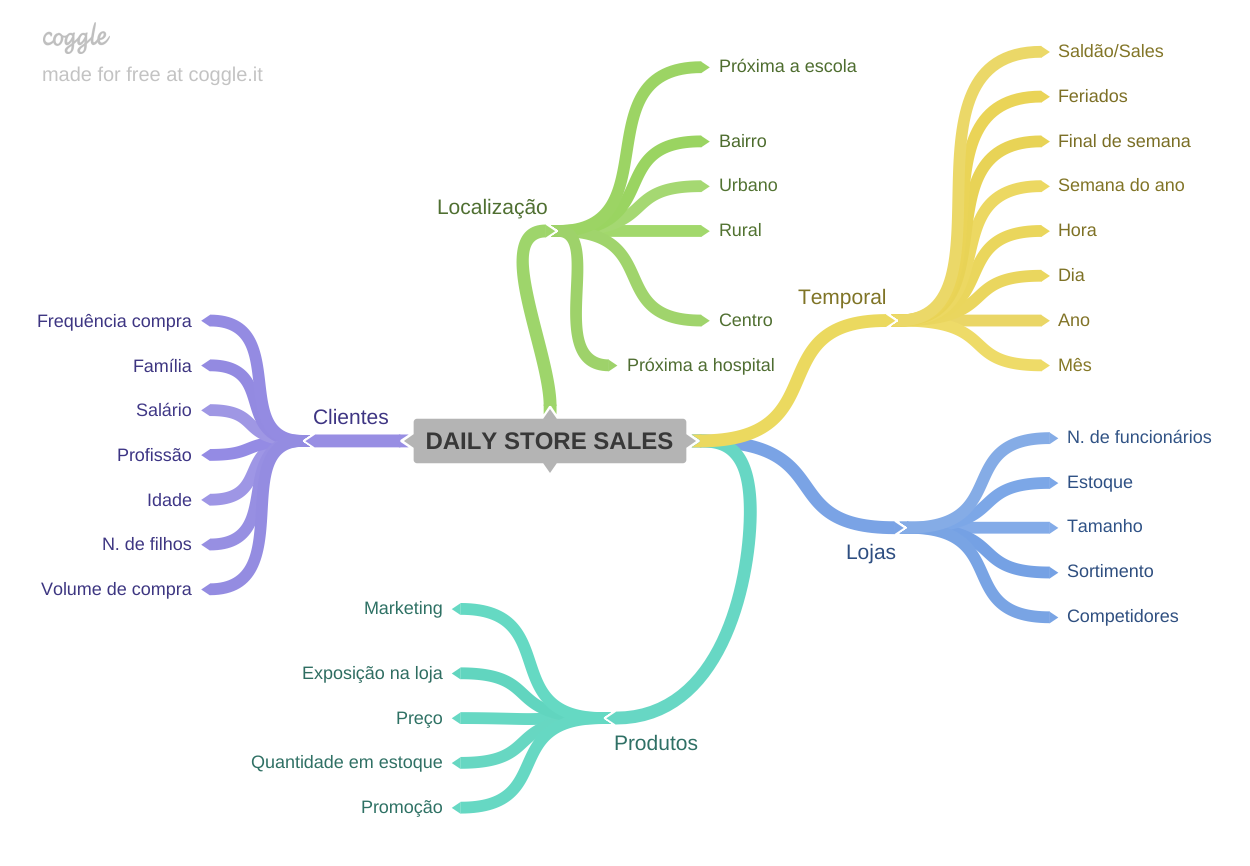

In [4]:
Image ('mapa_hipoteses.png')

### 2.2 Criação das hipóteses

#### 2.2.1 Hipóteses Loja

##### 1. Lojas com maior quadro de funcionários deveriam vender mais.

##### 2. Lojas com maior estoque deveriam vender mais.

##### 3. Lojas com maior porte deveriam vender mais.

##### 4. Lojas com menor porte deveriam vender menos.

##### 5. Lojas com maior sortimento deveriam vender mais.

##### 6 .Lojas com competidores a mais tempo deveriam vender mais.

##### 7 .Lojas com competidores mais próximos deveriam vender menos.

#### 2.2.2 Hipóteses Produto

##### 1. Lojas que investem mais em marketing deveriam vender mais.

##### 2. Lojas que expõe mais o produto nas vitrines deveriam vender mais.

##### 3. Lojas com menores preços deveriam deveriam vender mais.

##### 4. Lojas com preços menores nos produtos por mais tempo deveriam vender mais.

##### 5. Lojas com promos mais agressivas, deveriam vender mais.

##### 6 .Lojas com mais dias de promoção deveriam vender mais.

##### 7 .Lojas com mais promoções consecutivas deveriam vender mais.


#### 2.2.3 Hipóteses Tempo

##### 1.Lojas que tem mais feriados deveriam vender menos.

##### 2.Lojas que abrem nos primeiros 6 meses deveriam vender mais.

##### 3.Lojas que abrem nos finais de semana deveriam vender mais.

##### 4..Lojas abertas durante o feriado de natal deveriam vender mais.

##### 5.Lojas deveriam vender mais a longo dos anos.

##### 6 .Lojas deveriam vender mais no segundo semestre do ano.

##### 7.Lojas deveriam vender mais depois do dia 10 de cada mês.

### 2.3 Lista Final das hipóteses (Hipóteses que temos dados para comprovar)

##### 1. Lojas com maior sortimento deveriam vender mais.

##### 2 .Lojas com competidores a mais tempo deveriam vender mais.

##### 3 .Lojas com competidores mais próximos deveriam vender menos.

##### 4 .Lojas com mais dias de promoção deveriam vender mais.

##### 5 .Lojas com mais promoções consecutivas deveriam vender mais.

##### 6.Lojas que tem mais feriados deveriam vender menos.

##### 7.Lojas que abrem nos primeiros 6 meses deveriam vender mais.

##### 8.Lojas que abrem nos finais de semana deveriam vender mais.

##### 9..Lojas abertas durante o feriado de natal deveriam vender mais.

##### 10.Lojas deveriam vender mais a longo dos anos.

##### 11 .Lojas deveriam vender mais no segundo semestre do ano.

##### 12.Lojas deveriam vender mais depois do dia 10 de cada mês.

### 2.4 Feature Engineering

In [67]:
#year
df2 ['year'] = df2['date'].dt.year

#month
df2 ['month'] = df2['date'].dt.month

#day
df2 ['day'] = df2['date'].dt.day

#week of year
df2 ['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2 ['year_week'] = df2['date'].dt.strftime ('%Y-%W')

#competition since
df2 ['competition_since'] = df2.apply ( lambda x: dt.datetime (year=x ['competition_open_since_year'], month=x ['competition_open_since_month'], day=1  ), axis=1)
df2['competition_time_month'] = (( df2 ['date'] - df2 ['competition_since'] ) /30).apply (lambda x: x.days).astype(int)

#promo since
df2 ['promo_since'] = df2 ['promo2_since_year'].astype(str) + '-' + df2 ['promo2_since_week'].astype(str)
df2 ['promo_since'] = df2 ['promo_since'].apply (lambda x: dt.datetime.strptime (x + '-1', '%Y-%W-%w') - dt.timedelta (days=7))
df2 ['promo_time_week'] = ((df2['date'] - df2 ['promo_since'])/7).apply (lambda x: x.days).astype(int)

#assortment
df2 ['assortment'] = df2 ['assortment'].apply (lambda x: 'basic' if x== 'a' else 'extra' if x== 'b' else 'extended')

#state holiday
df2 ['state_holiday'] = df2 ['state_holiday'].apply (lambda x: 'public_holiday' if x== 'a' else 'easter_holiday' if x== 'b' else 'christmas' if x== 'c' else 'regular_day')

C:\Users\Pamela.magalhaes\AppData\Local\Temp\ipykernel_2396\4179488373.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2 ['week_of_year'] = df2['date'].dt.weekofyear


In [68]:
#Verificando
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
